# Linear regression

#####  Meng Lu

## Content
1. Introduction to regression and linear regression 
2. Gradient descent and parameter optimisation

3. Curve fitting: uni- and multi-variable models 
4. Control overfiting with regularisation: Lasso and Ridge regression

5. Uncertainty, interpretation, model assumptions and interpretation


## Regression
-------------------
The term "regression" is historical, refering to "regression towards the mean" or "reversion to the mean". It was originally coined by Francis Galton in the 19th century to describe a biological phenomenon: the heights of descendants of tall ancestors tend to regress down towards a normal average. 

In modern times, "regression" refers to techniques that are used to explore replationships among phenomena. It is not only for uncovering the mechanisms of interactions among phenomena in a system, but also for making predictions about the dynamics of one phenomenon if we know the change of another. 

For instance, if we have observed air pollutants accumulation patterns in a city is dependent upon the morphology of urban elements in this city, such as road network density or building density, then, we could acquire knowledge about the interaction between urban elements and air pollutants within this city-atmospheric system, and use these information to predict air pollution everywhere around the city where the the urban elements are available. The urban elements are much easier to aquire compared to putting expensive sensors densely around the entire city. For example, street networks can be acquired from *OpenStreetMap*. R, Python, QGIS, all have convinient tools or packages for extracting data from OpenStreetMaps. 

To explore relationships between phenomena, we rely on measurements. For example, in our case, the relationships between air pollution concentration measured at certain locations (the response or dependent variable) and the road density and popupation (the predictors or independent variables).  

Once we characterised the relationship, we can predict at all the locations where the predictors are a available. This is why **regression** has been summaried as *a technique of using discrete values for predicting continues values*.



## Linear regression and model fitting

The identification of the relationships is achieved by training an **assumed/hypothesized** model $h(.)$ using the observed response variable $y$ and predictors $X$.

$$y =  h_\theta(X) + \epsilon$$

where X is a matrix, consisting all the predictor variabels $x_1$, $x_2$,..., $x_n$.

$\\ $

Linear regression is a simple approach to supervised learning. It assumes that the dependence (relationship) of the response variable y, and predictors X, are linear:

$$h_\theta(X) = θ^TX$$ 



In [1]:
# Important modules (packages)

# for visualisation

import seaborn as sns 
import matplotlib.pyplot as plt   

# data structure
import numpy as np  # array
import pandas as pd # tabular

# statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import Ridge
from sklearn.linear_model import lars_path
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# you can use it for making your report
from IPython.display import Image # for inserting media in the notebook

# The modules below does not require understanding. 
import functools # The functools module is for higher-order functions: functions that act on or return other functions. In general, any callable object can be treated as a function for the purposes of this module.
import itertools #Functions creating iterators for efficient looping¶
from statsmodels.compat import lzip # auxilary function for printing 



<AxesSubplot:>

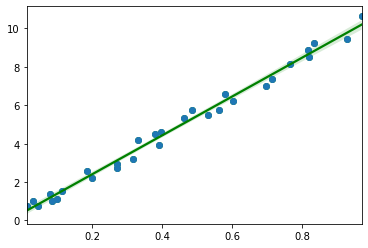

In [2]:
X = np.random.rand(30)
y = 10*X + np.random.rand(30)
plt.plot(X,y, "o")
sns.regplot(x=X, y=y, color="g")

**Linear regression** is ubiquitous in practice and the concept of it forms the foundation of most of more complex models. The questions are: 

1) How to estimate the coefficients (parameters)? 

    -> 1) Least square: ways of solving it a) Geometric/linear algebra (AT A x = Ab, A is X and x is coefficients). b) Calculus, gradient descent. 
    
    -> 2) Maximum Likelihood (ML: classic /frequenties statics), The OLS estimator is identical to the maximum likelihood estimator (MLE) under the normality assumption for the error terms.
    
    -> 3) Maximum a Posterior (MAP: Bayesian statistics)
 
2) How to reduce model overfitting? --> regularisation

3) how certain we are to the predicted parameters and predictions? --> Confidence and prediction intervals (frequentist, https://www.graphpad.com/support/faq/the-distinction-between-confidence-intervals-prediction-intervals-and-tolerance-intervals/), credible interval (Bayesian, it is an interval within which an unobserved parameter value falls with a particular probability. It is an interval in the domain of a posterior probability distribution or a predictive distribution.). 

4) Model assumptions

## Gradient descent

The procedure of fitting a model to data is referred as model **training**, the goal is to minimise a **cost function** $C(.)$ to estimate the model parameter. The cost function of a linear regression model is:

$$C(\theta) = \frac{1}{2m} \sum _{i=1}^m \left(h_\theta(X^{(i)})-Y^{(i)}\right)^2$$

where $i$ indicates the sample, $h(.)$ is the prediction function and $h_\theta(X^{(i)})$ indicates the prediction at sample i. $\theta$ refers to the parameters we are going to fit. 



For linear regression, the $\theta$ can be solved analytically using Ordinary Least Squares (OLS). A more general methond is to minimise $C(\theta)$ using a optimisation algorithm called [*gradient descent*](https://en.wikipedia.org/wiki/Gradient_descent)

**Gradient descent** is a (super important) iterative optimization algorithm used in machine learning to minimize a cost function. We will constantly see gradient desent, for example, in Logistic regression, gradient boosting, deep neural networks.   

Imagine a ball rolling down a hill. The ball tends to move in the direction of the fastest decrease until it reaches the bottom. With time, they’ll gain momentum and accelerate.

The idea behind gradient descent is similar: you start with an arbitrarily chosen position of the point and move it iteratively in the direction of the fastest decrease of the cost function. This is the direction of the negative gradient vector.

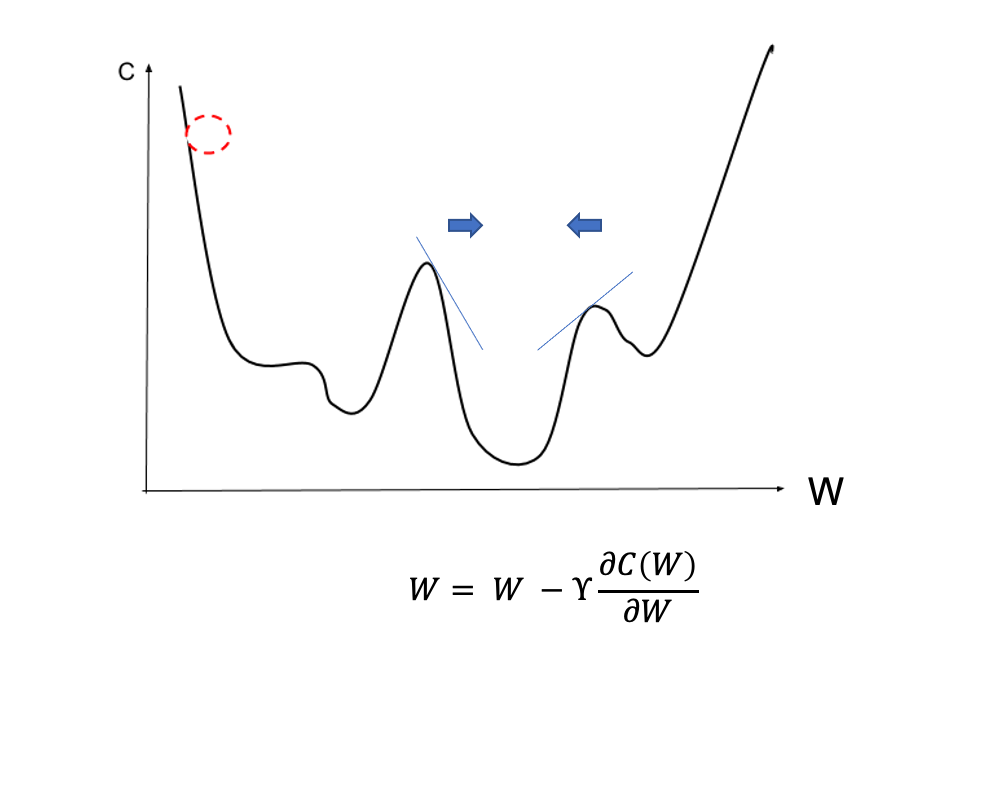

In [3]:
#from IPython.display import Image
Image(filename='../img/gd.png')
# if the slope if positive, move to the left; if negative, move the coefficient to the right.

Let's see an implementation of gradient descent. Suppose we want to estimate a parameter $v$, and our cost function is $v^2$. We remember from the calculus course that the derivative of $v^2$ is $2v$.

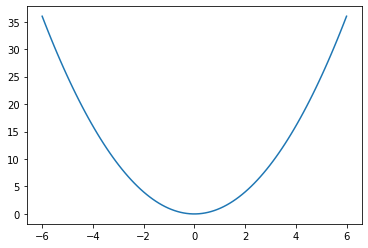

In [4]:
v = np.linspace(-6, 6, 100)# sample 100 points
cost = [np.sum(vi**2) for vi in v]
plt.plot(v, cost)

The function below is adapted from [(source)](https://realpython.com/gradient-descent-algorithm-python/)

0.030233087999999984

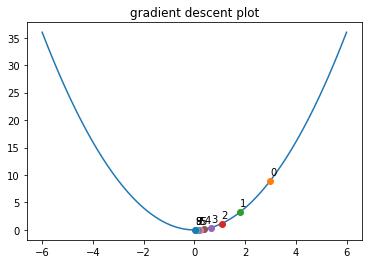

In [5]:

#gradient: a function that returns the gradient of the function we are trying to minimize
#start: where to start
# learn_rate: the rate to update our parameter
#n_iter: number of iterations.

def gradient_descent(
    gradient, start, learn_rate, n_iter=5, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):# stop iterating and return the result before n_iter is reached if the vector update in the current iteration is less than or equal to tolerance. This often happens near the minimum, where gradients are usually very small. Unfortunately, it can also happen near a local minimum or a saddle point.
            break
        vector += diff
 
        cost = np.sum(vector**2)  

        plt.plot(vector,cost, "o")
        plt.text(vector, cost+1, str(_))
         
    return vector

v = np.linspace(-6, 6, 100)# sample 100 points
cost = [np.sum(vi**2) for vi in v]
plt.title("gradient descent plot")
plt.plot(v, cost)
gradient_descent(gradient=lambda v: 2 * v, start=5.0, learn_rate=0.2, n_iter = 10)
 

 

1.7433922004999998

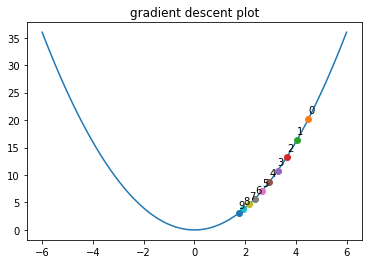

In [6]:
# try a slower learning rate
v = np.linspace(-6, 6, 100)# sample 100 points
cost = [np.sum(vi**2) for vi in v]
plt.plot(v, cost)
plt.title("gradient descent plot")
gradient_descent(gradient=lambda v: 2 * v, start=5.0, learn_rate=0.05, n_iter = 10)

Now let's have a look at the coefficient estimation in linear regression with gradient descent. 

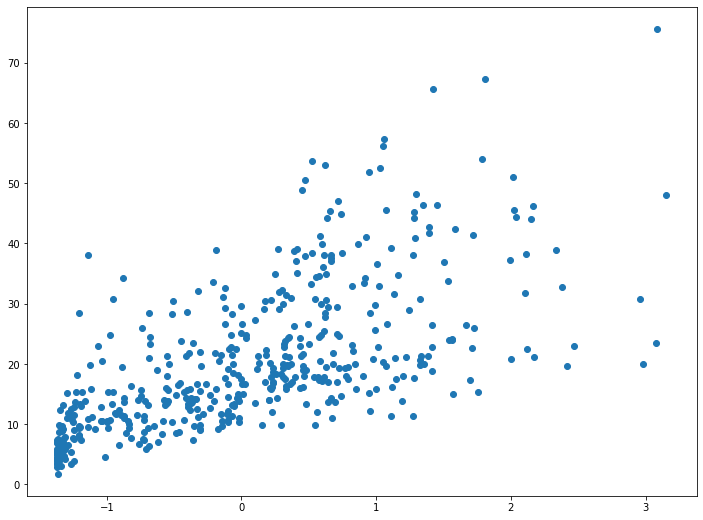

In [7]:

plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
spreadurl = 'https://raw.githubusercontent.com/mengluchu/uncertainty/master/data_vis_exp/DENL17_uc.csv'
# load the data
data = pd.read_csv(spreadurl)
data.head()
Y = data["wnd_day_value"]
X =( data["population_1000"]-np.mean(data["population_1000"]))/np.std(data["population_1000"])
plt.scatter(X, Y)
plt.show()

In [8]:
# Building the model
m = 0
c = 1

L = 0.001  # The learning Rate, try to alter it 
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m. 
    #Objective 1/n \sum(y-y_pred)^2, y_pred = mx+b
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (n, m, c)

#credit:
#https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

482.0 8.18664266490368 19.891472246747693


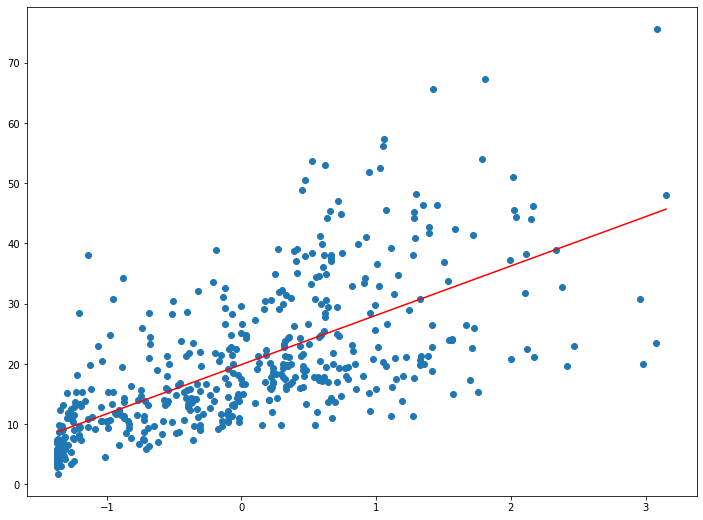

In [9]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [10]:
#compare:
X1 = sm.add_constant(X) # adding a constant
print(X1.columns)
model = sm.OLS(Y, X1)
res = model.fit()
print(res.summary()) # b = 19.8915, 8.1866  

Index(['const', 'population_1000'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:          wnd_day_value   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.29e-65
Time:                        13:22:17   Log-Likelihood:                -1741.1
No. Observations:                 482   AIC:                             3486.
Df Residuals:                     480   BIC:                             3495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Curve fitting

We will start from working with the simplest scenario: a **univariable** linear regression model, where there is only one variable $x$ in $X$: $$h_\theta(x) = θ_1x$$  

Then, we will be training a polynomial model in the form of 

$$h_\theta(x) = θ_1x + θ_2x + θ_2x^2+ θ_3x^3+ ... + θ_nx^n$$. 

As it name suggests, a **multivariable** model consists of more than one predictor variables. In our case, each variable is a polynomial transformation of the original input *x*. This is an important concept called **features engineering**, as they are the feature descriptors of the dependent variable. 

Today, with large amount of data available, **regression** is constantly cast into the context of big data. This immediately leads to a difficult situation: there are potentially large amount of **features** can be used for **regression**, as you can either add new **variables**, or tranform the input **variables** into new features. 

### Generating a dataset

Let's get started by fitting linear regression models using simulated data (i.e. We use data generated from a known function). As we have the knowledge about the underlying true model, which is normally unknown in real world situations, we can compare how different models approximate the underlying true model.

The underlying function generating the dataset includes a periodic component and a trend component. 

\begin{equation}
h(x) = sin(x) + 3x \quad eq.1
\end{equation}

We add gaussian noise $\epsilon$ (i.e. the  $\epsilon$ follows a gaussian distribution) with mean 0 and user-defianed standard deviation, to the data generation function: 

\begin{equation}
y = h(x)+ ε  = sin(x) + 3x +  \epsilon 
\end{equation}
 

We create a function "dummyData (func, sample_size, std)" for genearting the data, the function has three inputs:

* func: the function for generating the data, here we use eq.1
* sample_size: the number of points we want to generate.
* std: the standard deviation of the noise. 

Note: we artificially generate the input X: 
np.random.rand(sample_size); x=x*15-5


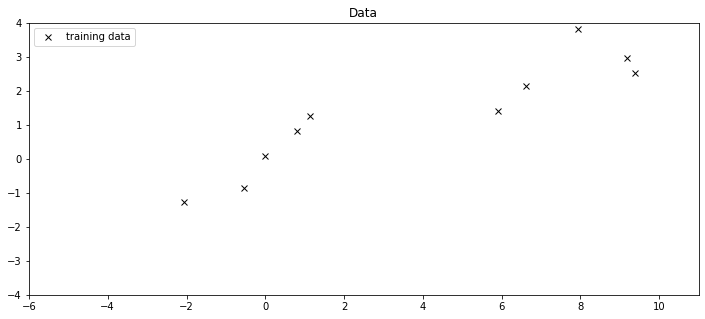

In [11]:

# Define the true function for generating dummy dataset
def func(x):
    # Generate sample dataset from a linearly transformed sinusoidal function: y=sin(x)+0.3*x+e (where 'e' is random noise)
    return np.sin(x) + .3*x

# Define function for generating dummy dataset
# std: standard deviation of error.  
def dummyData(func, sample_size, std):
    # Artificially generate input x
    x = np.random.rand(sample_size)[:,None]; x=x*15-5 # to spread data more
    # Call function to generate response y, and add a normaly distributed noise
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Generate dummy dataset
# 10 data points are created for model training, and another 5 are created to test the accuracy of the model
x_train, y_train = dummyData(func, 10, 0.25)

# Visualize the artificially generated dataset
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data')
plt.plot(x_train,y_train,'kx',label='training data') #kx: k: black, x: point shape "x"
plt.legend()

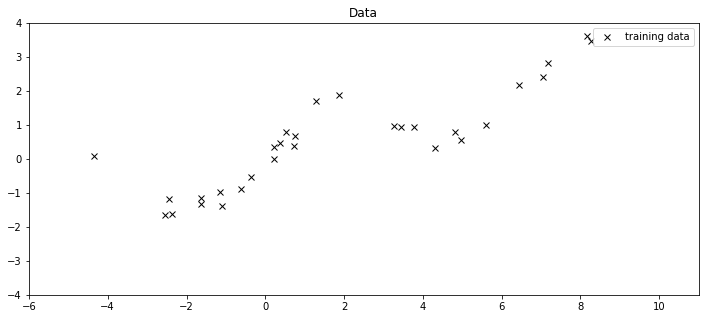

In [12]:
# Generating more data
x_train, y_train = dummyData(func, 30, 0.25)
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data')
plt.plot(x_train,y_train,'kx',label='training data') #kx: k: black, x: point shape "x"
plt.legend()

### Fitting models to the data

Our aim is to find a function that maps the predictors, X, to the response, y, through a function h_\theta(.), with paramethers $\theta$.


Contretely, you are going to find optimal **θ**, which is (*θ<sub>1</sub>*, *θ<sub>2</sub>*), to minimize the difference between **Y** and **M(x) = θ<sub>1</sub> + θ<sub>2</sub>x**, or **M(X) = θ<sup>T</sup>X** in a **vectorized** representation, where **X** is (*1*, *x*). (*1*, *x*) is referred as a **designed matrix**, as it is designed by combining *1* and *x* to form a handy **vectorized** representation.

Please try to figure out how all these can be achieved by experimenting with the following codes.

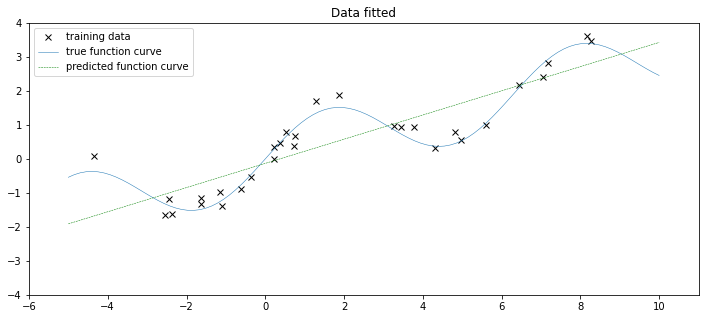

In [13]:
# Define a function to fit a linear model to the dummy data.
def fit(x, y):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Linear fit means a linear model in the form of M(x) = θ1 + θ2x is assumed
    # Or, in the form of matrix multiplication M(X) = θ'X, where
    # X is referred as designed vector/matrix in the form of [1, x]' and θ is [θ1, θ2]'
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Given the observed data y, a proper solution of θ to M(x) can be: θ* = argmin (||y - X @ θ||^2_2)
    theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, recall that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

def predict(x, theta, var, return_std:bool=False):
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix, add 1 (intercept)
    y = X_mat @ theta
    if return_std:
        e_std = np.sqrt(var) + np.zeros_like(y)
        return y, e_std
    return y

weights, variance = fit(x_train, y_train)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict = predict(x_all, weights, variance)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5, label='true function curve')
plt.plot(x_all, y_predict, '--g', linewidth=.5, label='predicted function curve')
plt.legend()

#### Exercise 1

In the above example, you have attempted to train a linear model by using 30 observations, please try to generate another set of data, which may contain 100 data points, using the same underlying true model, and fit your linear model again. Do you see some difference? What is the implication?

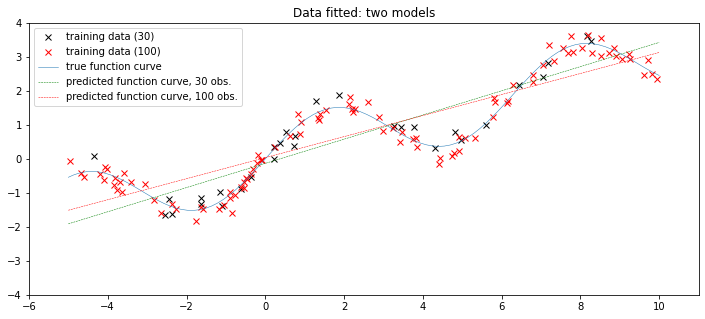

In [14]:
#==================================
# Answers and hints 0.1
#==================================

# Another set of observations
x_train2, y_train2 = dummyData(func, 100, 0.25)  # With less (only 5) observations
weights2, variance2 = fit(x_train2, y_train2)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict2 = predict(x_all, weights2, variance2)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted: two models')
plt.plot(x_train,y_train,'kx',label='training data (30)')
plt.plot(x_train2,y_train2,'rx',label='training data (100)')
plt.plot(x_all, y_true, linewidth=.5, label='true function curve')
plt.plot(x_all, y_predict, '--g', linewidth=.5, label='predicted function curve, 30 obs.')
plt.plot(x_all, y_predict2, '--r', linewidth=.5, label='predicted function curve, 100 obs.')
plt.legend()

Now, let's add some polynomial terms. The transform function below add polynormial terms to the original training set. 

In [15]:
#import functools
#import itertools

# Define a fuction that project inputs into higher order polynomial inputs. 
# For instance, when degree=3, x becomes to (x, x^2, x^3).

def transform(x, degree):
    # Transforms input array with polynomial features
    # x : (sample_size, n) ndarray
    # Output : (sample_size, 1 + nC1 + ... + nCd) ndarray

    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = []
    for degree in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x * y, items))
    return np.asarray(features).transpose()


(30, 3)


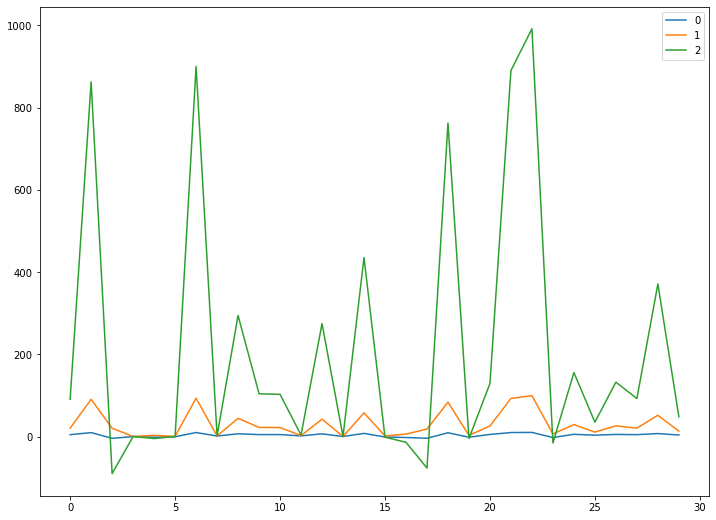

In [16]:
x_train, y_train = dummyData(func, 30, 0.25)
#plt.plot(transform(x_train,1))
#plt.plot(transform(x_train,2))
print(transform(x_train,3).shape) # order = 3 means we have 3 predictors: x, x^2, x^3.
plt.plot(transform(x_train,3)) 
plt.legend(pd.DataFrame(transform(x_train,3)))

In [17]:
print(np.amin(x_train), np.amax(x_train)) 

-4.483023488970039 9.971849851215874


In [18]:
x_all = np.linspace(-5, 30, 100).reshape(-1,1) # all possible x + data we've never seen before
y_true = func(x_all) # true function


Let's firstly assume we have 10 samples:


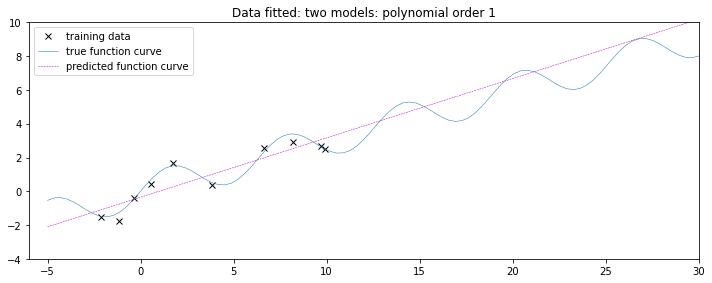

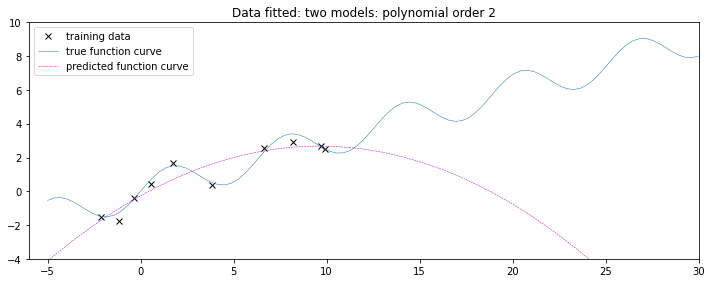

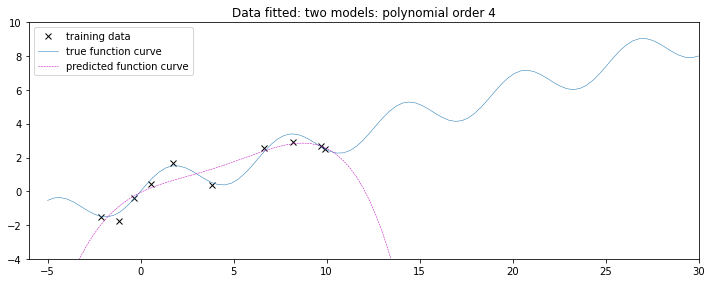

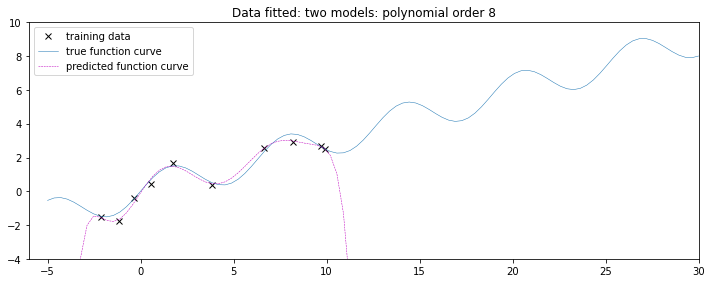

In [19]:
x_train, y_train = dummyData(func, 10, 0.25) 

for i, deg in enumerate([1, 2, 4, 8]):
    plt.figure(figsize=(12,20))
    plt.subplot(4, 1, i + 1)
    
    x_poly = transform(x_train, deg)  # Project original inputs into polynomial inputs
    weights3, variance3 = fit(x_poly, y_train)  # Fit data as a linear combination of the polynomial inputs
    y_predict3 = predict(transform(x_all, deg), weights3, variance3)  # Prediction
    
    y_true = func(x_all)  # True model values
    
    plt.xlim([-6., 30])
    plt.ylim([-4, 10])
    plt.title(f'Data fitted: two models: polynomial order {deg}')
    plt.plot(x_train,y_train,'kx',label='training data')  # Plot dummy dataset data points
    plt.plot(x_all, y_true, linewidth=.5, label='true function curve')  # True model values
    plt.plot(x_all, y_predict3, '--m', linewidth=.5, label='predicted function curve')  # Polynomial data fit
    plt.legend()

What if we sample a lot points?

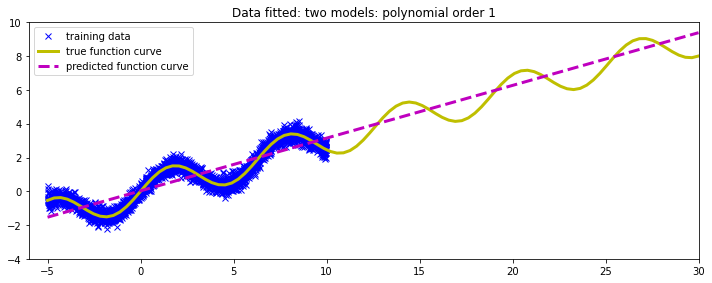

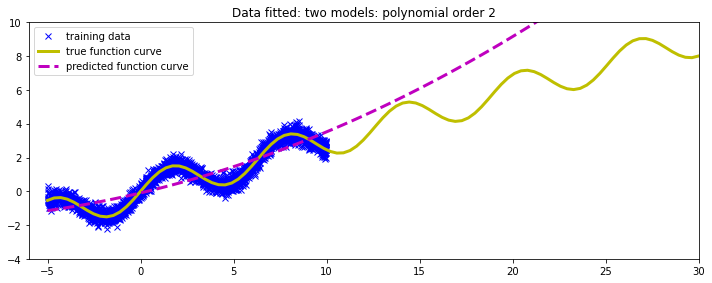

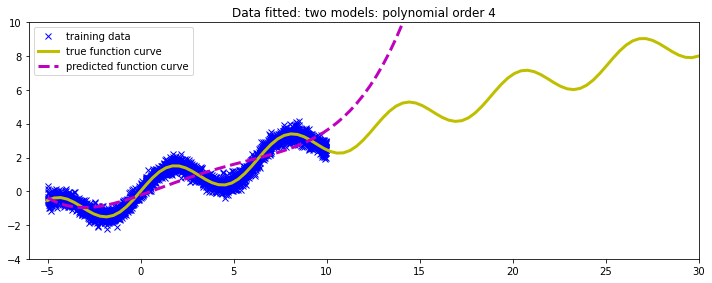

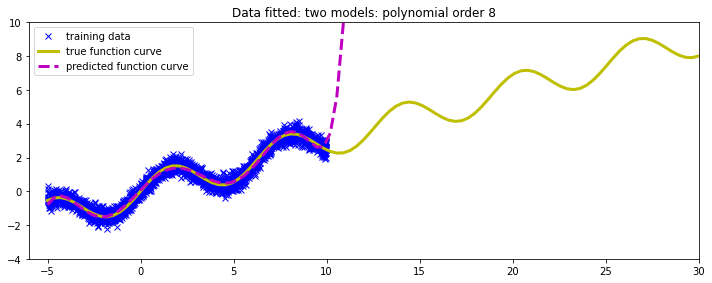

In [20]:
x_train, y_train = dummyData(func, 3000, 0.25) 

for i, deg in enumerate([1, 2, 4, 8]):
    plt.figure(figsize=(12,20))
    plt.subplot(4, 1, i + 1)
    
    x_poly = transform(x_train, deg)  # Project original inputs into polynomial inputs
    weights3, variance3 = fit(x_poly, y_train)  # Fit data as a linear combination of the polynomial inputs
    y_predict3 = predict(transform(x_all, deg), weights3, variance3)  # Prediction
    
    y_true = func(x_all)  # True model values
    
    plt.xlim([-6., 30])
    plt.ylim([-4, 10])
    plt.title(f'Data fitted: two models: polynomial order {deg}')
    plt.plot(x_train,y_train,'bx',label='training data')  # Plot dummy dataset data points
    plt.plot(x_all, y_true, 'y', linewidth=3, label='true function curve')  # True model values
    plt.plot(x_all, y_predict3, '--m', linewidth=3, label='predicted function curve')  # Polynomial data fit
    plt.legend()

#### Two important observations:

* More data can support a more flexible model! This is why machine learning shines in the era of big data. 

* The more flexible a model is, the weaker it may be for extropolating (predicting to the data range it never seen before). 


## Regularisation


As we've seen from the above example, we see the model over-fitting problem -- we can use as many covariates as we like but the model will not be generalised to predict data we've never seen before. In linear regression, this is also closely related to "collinearity", which means the covariates are dependent to each other and lead to inflated coefficient estimation.

One important strategy to deal with the problem is called **regularisation**, where we control (or regularise) the parameter space. To do this, in the cost function, we add a term about all the coefficients. 

Two classic regularisations are L1 and L2 norms. L1 norm takes the absolute value (|.|), and L2 norm takes the squares $(.)^2$. Their applications in regression are called Lasso (least absolute shrinkage and selection operator) regression (L1 norm) and Ridge regression (L2 norm). 



### Ridge regression 

We firstly introduce Ridge regression, it is computationally more efficient compared to Lasso.

*Ridge regression* adds a second-order penalty on the SSE: $$\text{SSE}_{L_2} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^P \beta_j^2.$$ In effect, this method *shrinks* the estimates towards 0 as the $\lambda$ penalty become large.


### Lasso regression

However, Ridge regression does not schrink the coefficient to absolute 0 for any value of the penalty. Even though some parameter estimates become negligibly small, this model does not conduct *feature selection*.

For this reason, Lasso becomes more popular. It uses the L1 penalty. 
$$\text{SSE}_{L_1} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^P |\beta_j|.$$ While this may seem like a small modification, the practical implications are significant. 

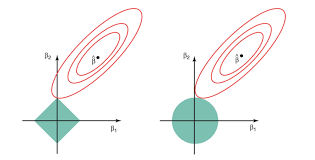

In [21]:
# Isosphere view of L1 (left) and L2 (right) norm

Image('../img/lassoridge.png')

### Ridge and Lasso Paths

Text(0, 0.5, 'Standardized Coefficient')

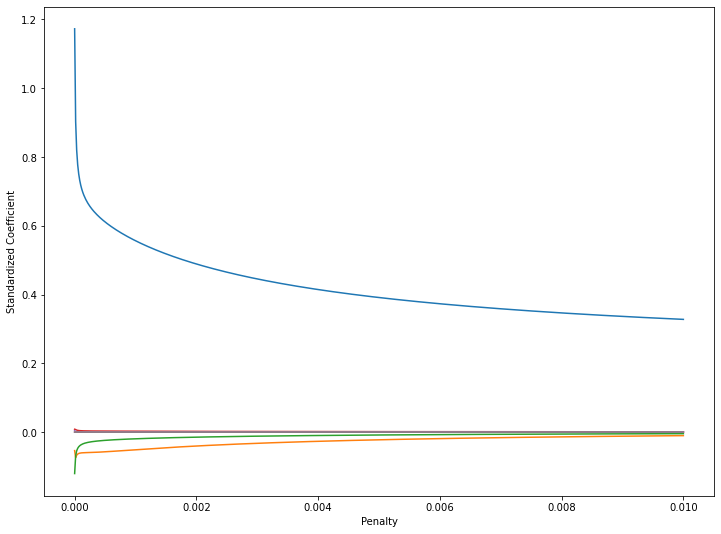

In [22]:
deg = 8
x_train, y_train = dummyData(func, 100, 0.25) 
x_poly = transform(x_train, deg)  # Project original inputs into polynomial inputs

lambda_range = np.linspace(0.0, 0.01, 600)
ridgeModel = Ridge(normalize=True)
coeff_path = []

for a in lambda_range:
    ridgeModel.set_params(alpha = a)
    ridgeModel.fit(x_poly, y_train)
    coeff_path.append(ridgeModel.coef_[0])

ax = plt.gca()
ax.plot(lambda_range, coeff_path)
ax.set_xlim((-0.0005, 0.0105))
plt.xlabel("Penalty")
plt.ylabel("Standardized Coefficient")



**Standard coefficients**: We use standard coefficients when independent variables (predictors) for a particular model are expressed in different units. For Example, we have three independent variables: height, age, and weight. Height is represented in centimeters, weight in kilograms, and age in years. If we want to rank these predictors based on the unstandardized coefficient (which directly comes when we train a regression model), it would not be a fair comparison since the units for all the predictors are different.

The standardized coefficients of regression are obtained by training(or running) a linear regression model on the standardized form of the variables.

The standardized variables are calculated by subtracting the mean and dividing by the standard deviation for each observation, i.e. calculating the Z-score. It would make mean 0 and standard deviation 1. Then, they don’t represent their original scales since they have no unit.

For each observation “j” of the variable X, we calculate the z-score using the formula:

$$ Z_j = \frac{X_j - mean(X)} {sd (X)}$$

Let's have a look at the Lasso path. With Lasso, we can use an implemented function "lars_path"

.

Text(0, 0.5, 'Standardized Coefficient')

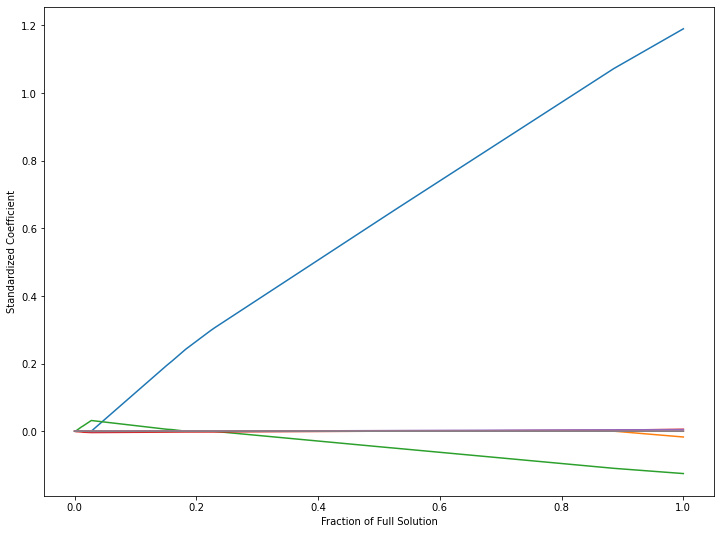

In [23]:
# compute regularization path using the LARS
# np.ravel(y_train): flatten the array. 
lambdas, _, coefs = lars_path(x_poly, np.ravel(y_train), method = 'lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('Fraction of Full Solution')
plt.ylabel('Standardized Coefficient')

The x-axis is the fraction of the full solution (i.e., ordinary least squares with no penalty). Smaller values on the x-axis indicate that a large penalty has been used. When the penalty is large, many of the regression coefficients are set to 0.


### Penalty value versus RMSE


Text(0, 0.5, 'RMSE (Cross-Validation)')

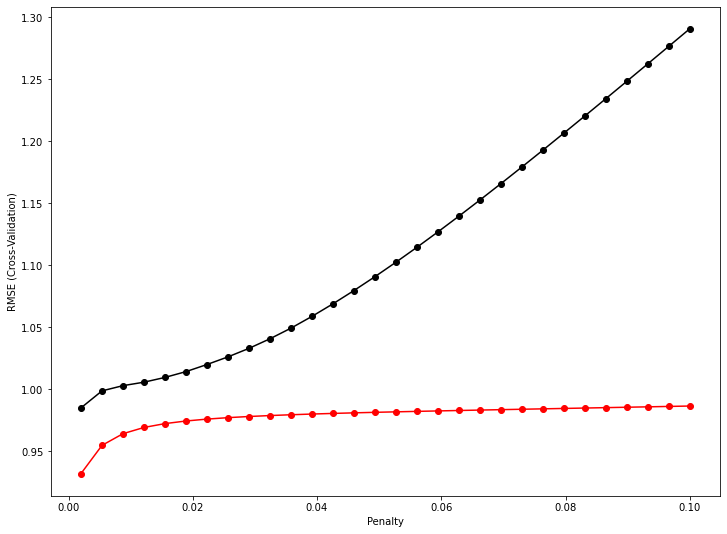

In [24]:
x_train, y_train = dummyData(func, 200, 0.75) # add variance with a higher noise
x_poly = transform(x_train, deg)  # Project original inputs into polynomial inputs

# penalty value versus RMSE
lambda_range = np.linspace(2e-3, 0.1, 30)
score_rmse = np.zeros(30)

ridgeModel = Lasso(normalize=True)

#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

for adx, a in enumerate(lambda_range):
    temp_scores = cross_val_score(ridgeModel.set_params(alpha = a),
                                  x_poly, y_train,
                                  cv=10, scoring="neg_root_mean_squared_error")
    temp_scores = np.sqrt(-1.0 * temp_scores)
    score_rmse[adx] = np.mean(temp_scores)
    
plt.plot(lambda_range, score_rmse, '-ko')
plt.xlabel("Penalty")
plt.ylabel("RMSE (Cross-Validation)")

 
score_rmse = np.zeros(30)

ridgeModel = Ridge(normalize=True)

for adx, a in enumerate(lambda_range):
    temp_scores = cross_val_score(ridgeModel.set_params(alpha = a),
                                  x_poly, y_train,
                                  cv=10, scoring="neg_root_mean_squared_error")
    temp_scores = np.sqrt(-1.0 * temp_scores)
    score_rmse[adx] = np.mean(temp_scores)
    
plt.plot(lambda_range, score_rmse, '-ro')
plt.xlabel("Penalty")
plt.ylabel("RMSE (Cross-Validation)")



### Lasso Prediction

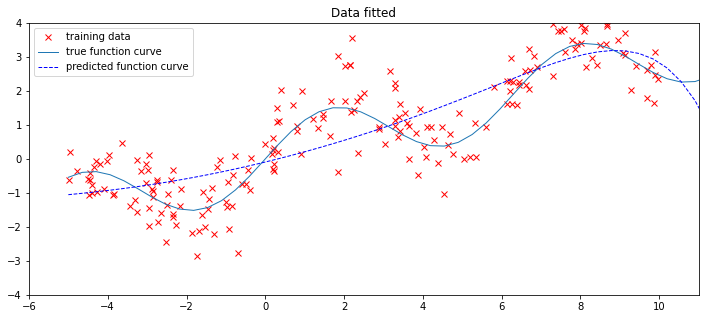

In [25]:
# Lasso Prediction
deg = 8 # Again, use the polynomial model of order 8 already shown above

# You can directly define your model by calling the Lasso function imported from "sklearn", and set the extent of regularization.
model_lasso = Lasso(alpha=2e-3, normalize=True)  # try to experiment with this parameter to see how it affects the model fitting.
#try 2e-4, 2e-2...
# Then, fit this model to the data.
model_lasso.fit(transform(x_train, deg), y_train)

# Make predictions every where to show the fitted curve.
y_predict = model_lasso.predict(transform(x_all, deg))

# Plot the data. Does the fitted curve look less complex than it was in section 1.1?
# Remember try to experiment with different alpha.
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'rx',label='training data')
plt.plot(x_all, y_true, linewidth=1, label='true function curve')
plt.plot(x_all, y_predict, '--b', linewidth=1, label='predicted function curve')
plt.legend()


In [26]:
#variable coefficients
model_lasso.coef_

array([ 2.82258094e-01,  1.82702105e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.71683545e-08])

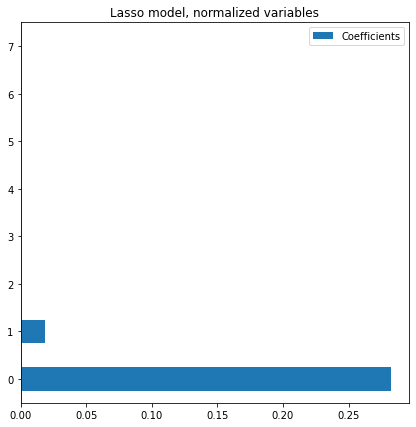

In [27]:
coefs = pd.DataFrame(
    model_lasso.coef_,
    columns=['Coefficients']
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Uncertainty quantification and interpretation

Commonly, it is not enough to just fit a model to do prediction. We also want to know how confident we are to our estimated coefficients and to our model predictions (**uncertainty quantification**) and the contributions of each predictior (**model interpretability**). Unvertainty quantificaiton and model interpretation are at the core of statistics.

Remember there are assumptions associated with a linear regression model. Voilating these assumptions doesn't mean you cannot fit a linear regression model, but the prediction and estimated uncertainty is less reliable. (**Note: here provides a brief description for each of the assumptions. The test statistics for different assumptions and more details are given in the section " Regression diagnostics" below when we fit the real-life data**).  

1. Linearity: The relationship between X and Y is linear.

2. Homoscedasticity: The variance of residual is the same for any value of X.
   - relating to: confidence interval. The influence of X differ. 
   - Quantile regression 
   
3. The conditional mean of error E(e_i|X_i) is 0.
   - relating to: nonlinear relationship, misspecification of a model. 

4. Independence: The residuals are indenpendent. The value of one error is not affected by the value of another. 
   
   - Estimated coefficients are no longer optimal (though still unbiased). In this case the optimal estimator is the generalized least squares solution. For GLS, check: http://www.personal.psu.edu/asb17/old/sta4853/files/sta4853-27print.pdf
   - As the data is actually less, t-test, F-test are biased. Confidence interval and standard error are affected. 

5. Normality: For each value of x, the errors have a normal distribution, the normal distribution is centered on the regression line.  

   - Normality violation will affect the estimates of the standard error (SE) and the confidence interval. 
   - If the number of observations are large, the effect is small. 
   - Handle it by tranformation. 

6. No multi-colinearity: 
   - The estimation of coefficients become very sensitive to individual observations. THe addition or deletion of a few observations can change the coefficient estimates dramatically. 
   - The variance of the coefficient estimates becomes inflated. As the coefficients are more variable, insignificant independent variables may appear significant.



You can see that The (4) is the most common problem in spatiotemoral data analysis. That's why the development of time series analysis, Geostatitics and spatial econometrics. And nowadays, machine learning. We already had a look at how to address (6) with regularisation.  

These assumptions can be summed up a bit: 
1. Linearity and multi-colinearity. 
2. Independent, identical and normally distributed errors with conditional mean 0.  


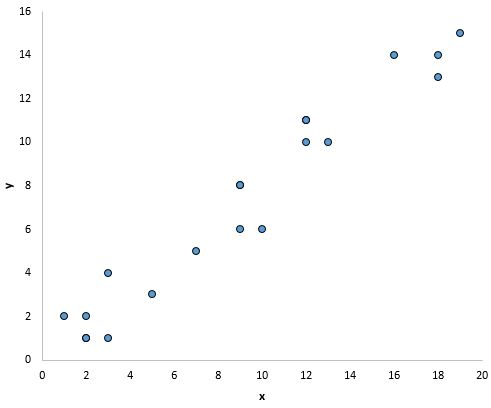

In [28]:
#Linearity: 
Image(filename='../img/lm_l.jpeg')


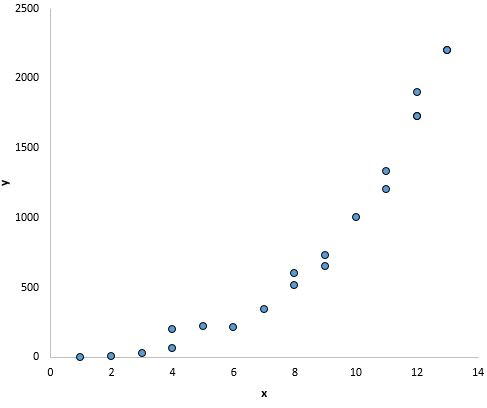

In [29]:
#None Linearity
Image(filename='../img/lm_nl.jpeg')


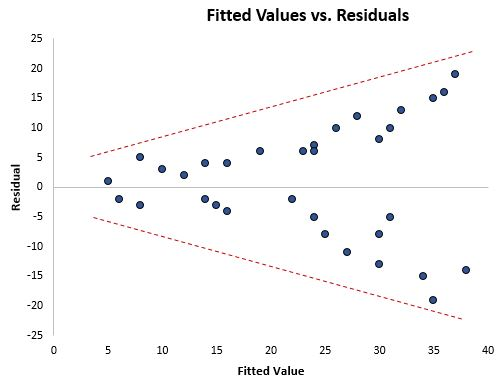

In [30]:
#Homoscedasticity 
# The estimated beta is unbiased but our confident interval is going to be too small (overconfidence). At larger x, the predictions are less meaningful.  
Image(filename='../img/lm_ho.jpeg')
 


If the conditional distributino of y, p(y|x), is different for different X, we may consider a method called **quantile regression**: we fit a models each quantiles. Quantile regression can be generalised to nonlinear regression and machine learning methods. Even Neural networks.

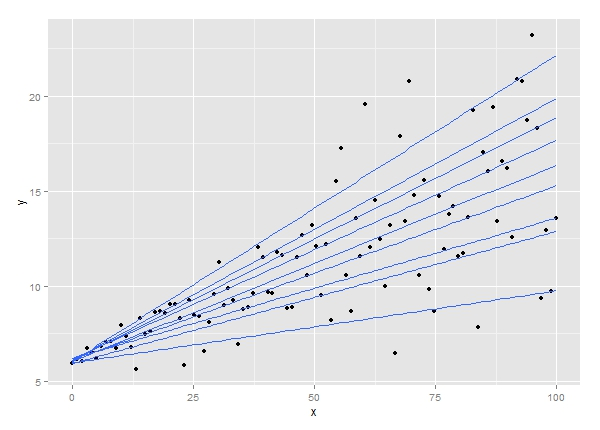

In [31]:
#Quantile regression
#Estimate quantiles instead of the conditional mean:
#It appears we can make decent estimates of the 0.90 quantile for increasing values of x despite the increasing variability.
Image(filename='../img/qreg.jpeg')
#source: https://data.library.virginia.edu/getting-started-with-quantile-regression/


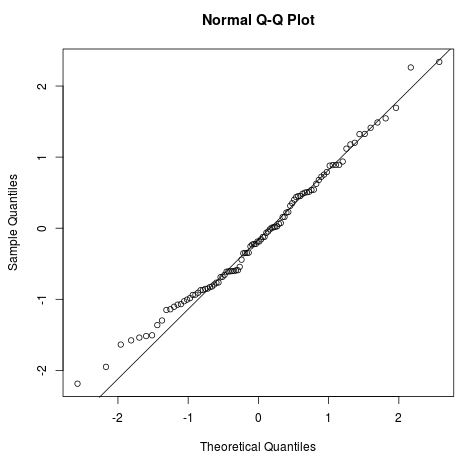

In [32]:
#Normality
Image(filename='../img/lm_nor.jpeg')


**Let's use our $NO_2$ dataset (DENL17_uc.csv) and see the linear regression fitting in real-life.** 

We will only look at two predictors, one is the total primary road length within 50 m buffer, for small-scale traffic effects, and the other is the total primary road length within 5000 m buffer, for larger-scale background effects. It reflects how urbanised an area is and the population.    

In [33]:
#import statsmodels.api as sm
spreadurl = 'https://raw.githubusercontent.com/mengluchu/uncertainty/master/data_vis_exp/DENL17_uc.csv'
# load the data
ap = pd.read_csv(spreadurl)

X = ap.filter (regex="road_class_2_50$|road_class_2_5000$") 
Y = ap['wkd_day_value'] 
X = sm.add_constant(X) # adding a constant
print(X.columns)
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

Index(['const', 'road_class_2_5000', 'road_class_2_50'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:          wkd_day_value   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.90e-56
Time:                        13:22:21   Log-Likelihood:                -1892.3
No. Observations:                 482   AIC:                             3791.
Df Residuals:                     479   BIC:                             3803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Before we fit the model, we can have a look at the distribution of our response (y), (though it is more accurate to check the error). 

* If y follows a normal distribution, then the regression residuals will also be normally distributed. 

* If y follows a different distribution, we may want to try transforming the variable or using a GLM (general linear model). Knowing the distribution of y can always lead to a better modeling design. 

* It doesn't mean we cannot use linear regression if the distribution of y is not normal.


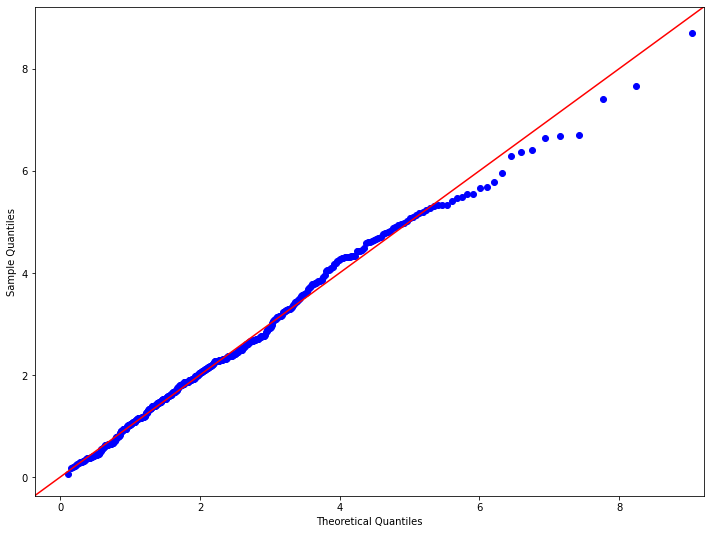

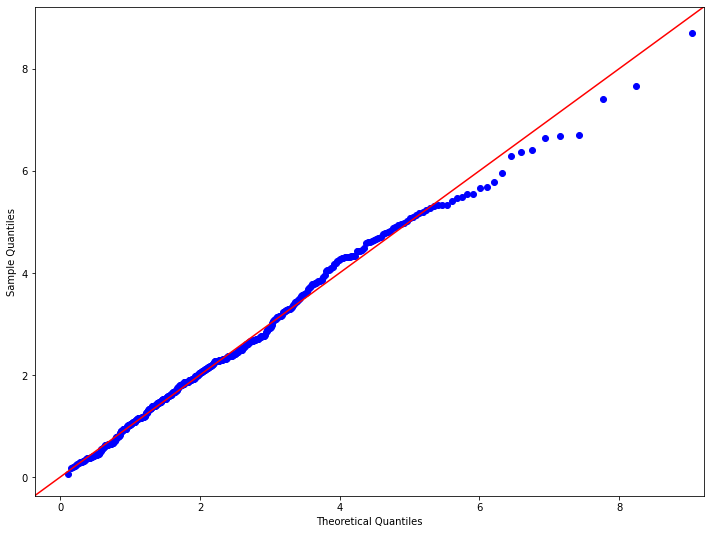

In [34]:
# A distribution can be passed to the second argument to test the distribution of the variable.  
# we found it follows a gamma distribution

#distribution = stats.t
#sm.qqplot(Y, distribution, fit=True, line="45")

distribution = stats.gamma
sm.qqplot(Y, distribution, fit=True, line="45")
 

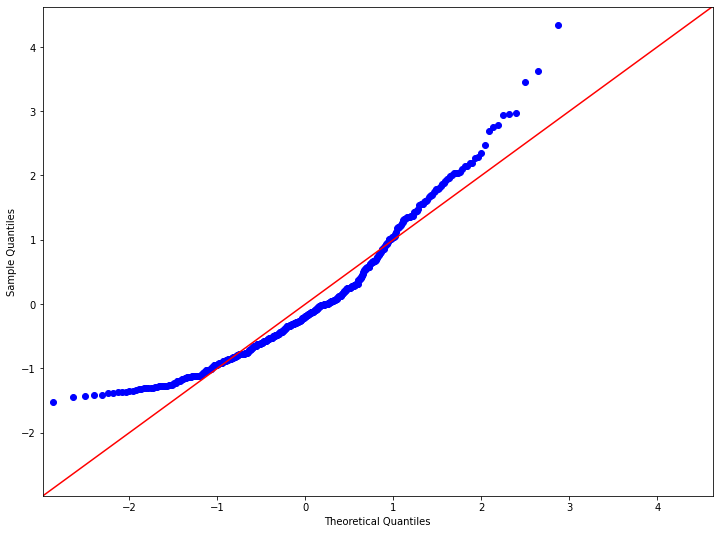

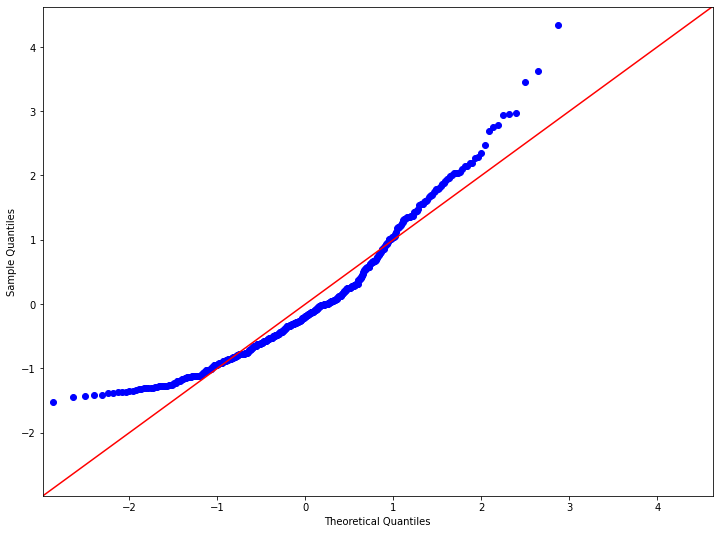

In [35]:
#sm.qqplot: by default, compares our data with normal distribution. (scipy.stats.distributions.norm).
sm.qqplot(Y, fit=True, line="45")
# you can use the same function to test the regression residuals.

### Regression diagnostics¶

Recall the assumptions that ensure a good linear regression model fitting. Now we can have a check of our assumptions:

1. Linearity and multi-colinearity. 
2. Independent, identical and normally distributed errors with conditional mean 0.  

#### Assumption 1: Linearity

For checking linearity, we can use the "Rainbow test". The null hypothesis is that the relationship is properly modelled as linear

In [36]:
a = sm.stats.linear_rainbow(res)
print("F-statistics:", a[0], "p-value:", a[1])


F-statistics: 0.770222192511524 p-value: 0.9780999220123715


#### Assumption 2: Homoscedasticity

* Cause: Our model may be giving too much weight to a subset of the data, especially where the error variance was the largest.

* Consequence: The standard errors are biased, leading to biases in significance tests for coefficients due to  being biased. Additionally, the confidence intervals will be either too wide or too narrow.

##### How to test:

The Breusch–Pagan test is used to test for heteroskedasticity in a linear regression model. (Derived from the Lagrange multiplier test principle), it tests whether the variance of the errors from a regression is dependent on the values of the independent variables. In that case, heteroskedasticity is present.

The null hypothesis is homoskedasticity. In this test, the Null hypothesis is not rejected, indicading homoscedasticity. 

In [37]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.628788452592634),
 ('p-value', 0.0988260320845803),
 ('f-value', 2.3222909291124),
 ('f p-value', 0.09915170393137272)]

A simple and effective way is to look at the distribution of the residuals in 1-d. We can see that the variance of error is not uniform.  

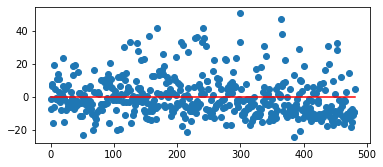

In [38]:

fig, ax = plt.subplots(figsize=(6,2.5))
#pred_val = res.fittedvalues.copy()
plt.plot(res.resid.index,res.resid, "o")
plt.plot(res.resid.index, np.zeros(len(res.resid)), 'r-')
 

#### Assumption 3: Independence

* Consequence: This will impact our model estimates.
* Remedy: modeling sptial or temporal autocorrelations. 

##### Test:
For spatial data: Moran's I:

As we saw in the lecture "descriptive statistics", the "indenpendence" assumption is voilated with spatial data. 

For time series data: Durbin-Watson test:
The summary statistics shows the result for Durbin-Watson test. 
Durbin-Watson:                   1.747

It doesn't say much because our data ist not ordered. Nevertheless, the Durbin-Watson test indicates the following:  

* Value of 2 indicates no autocorrelation.
* Values of 1.5 < d < 2.5 are normal and generally show that there is no alarming autocorrelation in the data.
* less than 1.5: positive autocorrelation
* 2 to 4: negative autocorrelation


#### Assumption 4: Normality
* Consequence: Biases in confidence intervals.

###### Test:
The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution. We see in the summary statistics that 
Jarque-Bera (JB):              173.533

We can also look at the p-value, a p-value<0.05 from this test means that you can reject the null hypothesis that the data is normally distributed.

In [39]:
name = ['Jarque-Bera', 'p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
lzip(name, test)


[('Jarque-Bera', 173.533440828099),
 ('p-value', 2.078222829750558e-38),
 ('Skew', 1.1989745863770798),
 ('Kurtosis', 4.700149704508119)]

Again, an effective way is to look at the qqplot as mentioned:
    

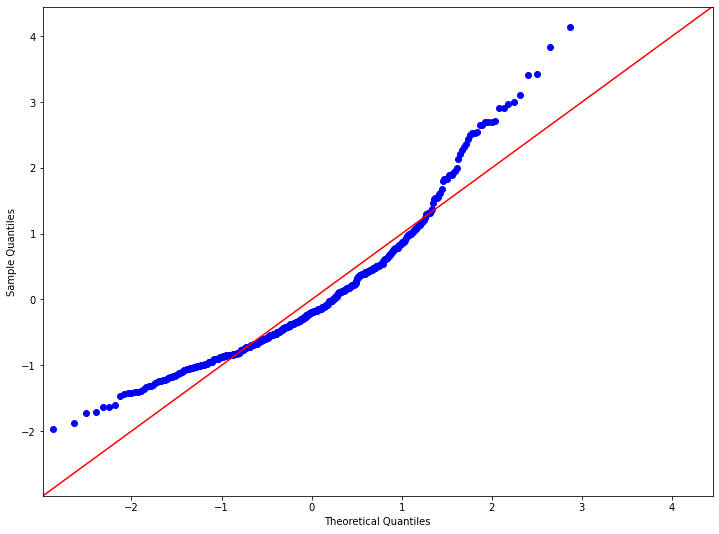

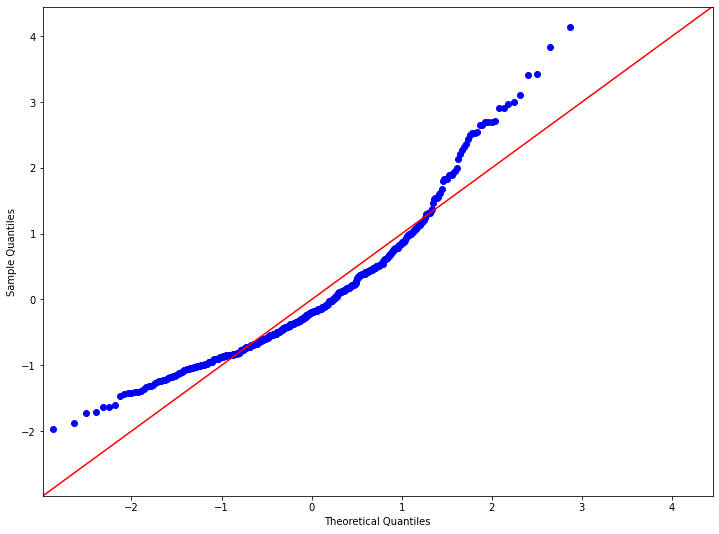

In [40]:
sm.qqplot(res.resid, fit=True, line="45")

This is a bit disappointing, we have three assumptions voilated: Homoscedasticity, Normality, and Independency. This means our model estimation may not be perfect, and the estimation of our confidence interval may be biased. __This is how the most data in reality look like!__

The good news is that, a most important assumption, linearity, holds. We have good hopes that a linear regression will provide us some useful information. 

External resources:

Please refer to these two excellent [blogs: 1](https://www.statology.org/linear-regression-assumptions/) [ 2](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) for more insights about how to test and deal with the voilation of these assumptions. 


In [41]:
#It is still more gamma. 
#sm.qqplot(res.resid, distribution, fit=True, line="45") 

### Model fitting

Let's have a look at our predictions in each prediction dimension.  

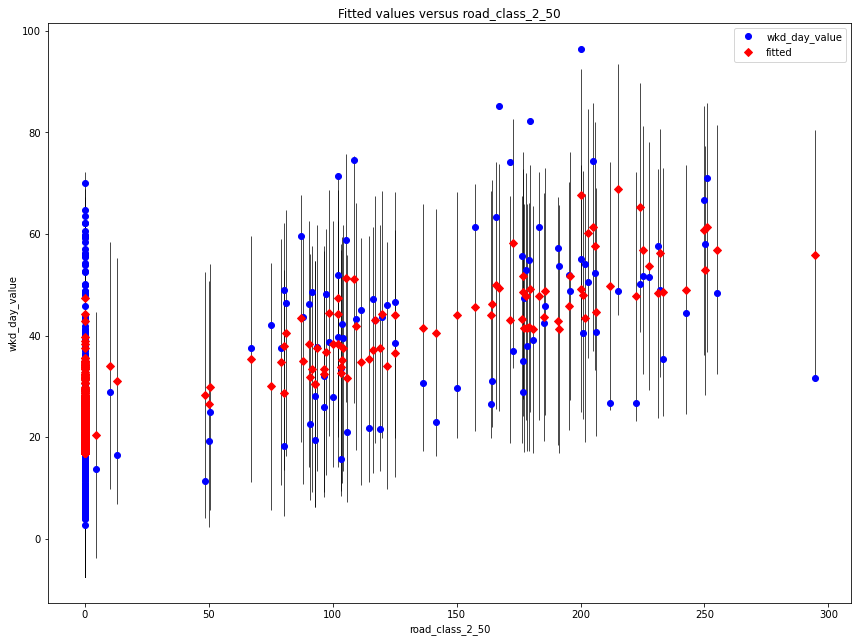

In [42]:
fig = sm.graphics.plot_fit(res,'road_class_2_50')
fig.tight_layout(pad=1.0)
# The vertical lines indicates the prediction interval: 95% of the chance the data will fall into this interval.  

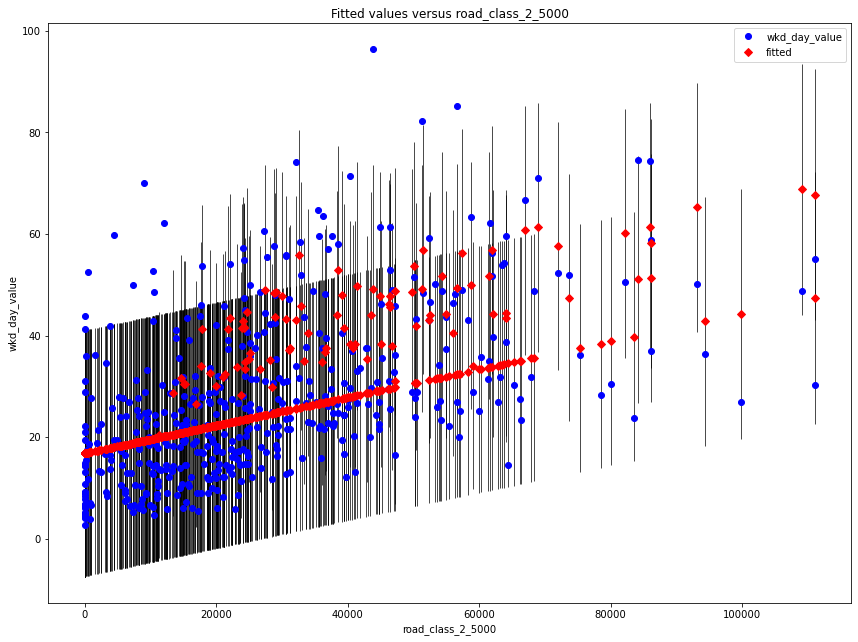

In [43]:
fig = sm.graphics.plot_fit(res,'road_class_2_5000')
fig.tight_layout(pad=1.0)

### Advanced: variable influence

How does each independent variable affect the dependent variable considering other independent variables?

<AxesSubplot:xlabel='road_class_2_50', ylabel='wkd_day_value'>

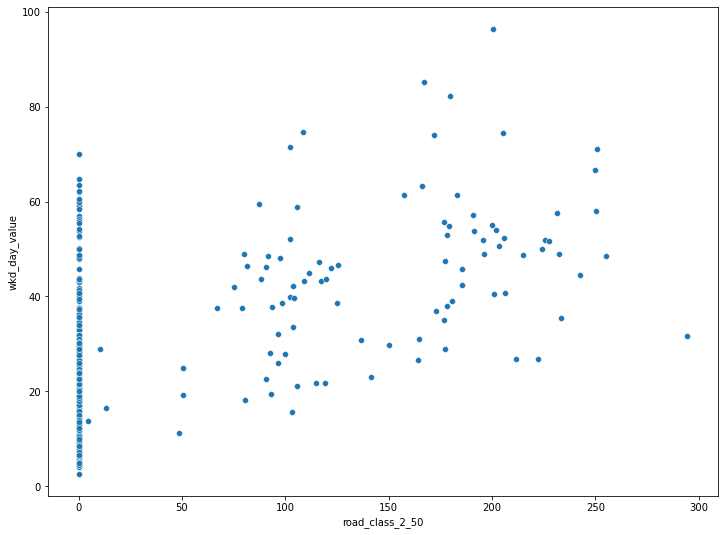

In [44]:
#If we don't consider other independent variables, the relationship between road_class_2_50 and NO2 values look like below (we already looked at it in the lab "descriptive statistics", pair-ed scatterplot):

import seaborn as sns
sns.scatterplot(data = ap, x = "road_class_2_50", y = "wkd_day_value" )

Now we are doing multi-variable regression, and need to also account for the other variables. In addition, we need to inspect unmodeled non-linear relationships or unmodeled interactions.

The plot fulfills this aim is called Component-Component plus Residual (CCPR) Plots. The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The partial residuals plot is defined as Residuals+$𝐵_𝑖𝑋_𝑖$   versus $𝑋_𝑖$. The component adds $𝐵_𝑖𝑋_𝑖$ versus $𝑋_𝑖$ to show where the fitted line would lie. Care should be taken if $𝑋_𝑖$ is highly correlated with any of the other independent variables. If this is the case, the variance evident in the plot will be an underestimate of the true variance.

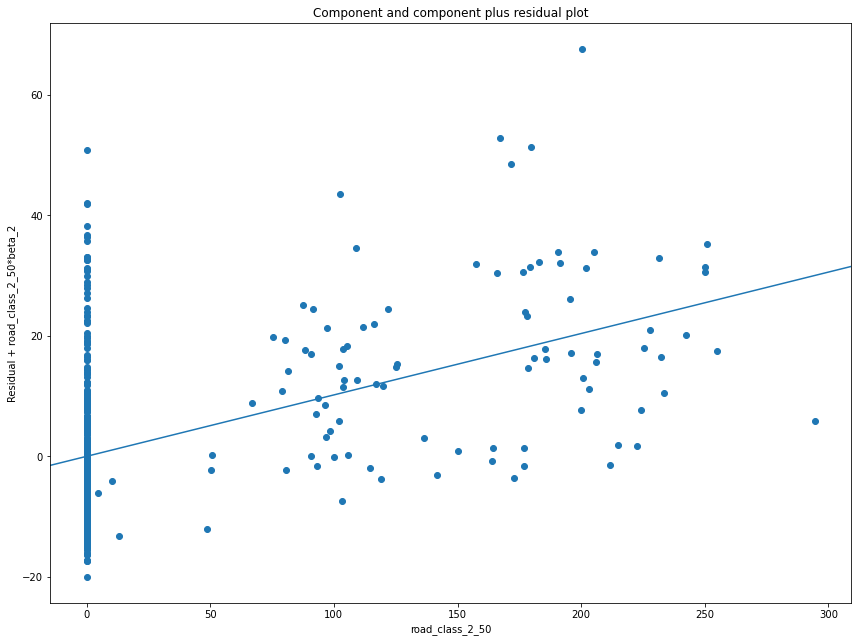

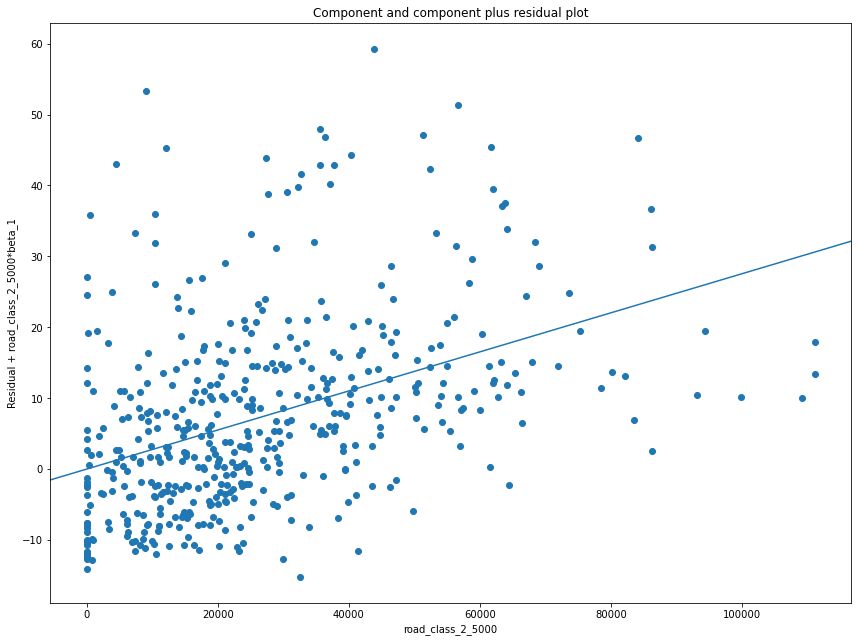

In [45]:
fig = sm.graphics.plot_ccpr(res, 'road_class_2_50')
fig.tight_layout(pad=1.0)

fig = sm.graphics.plot_ccpr(res, 'road_class_2_5000')
fig.tight_layout(pad=1.0)


### What variables do Lasso think are important?

We talked the "feature selection" of Lasso. Let's have a look at what variables are important according to Lasso.

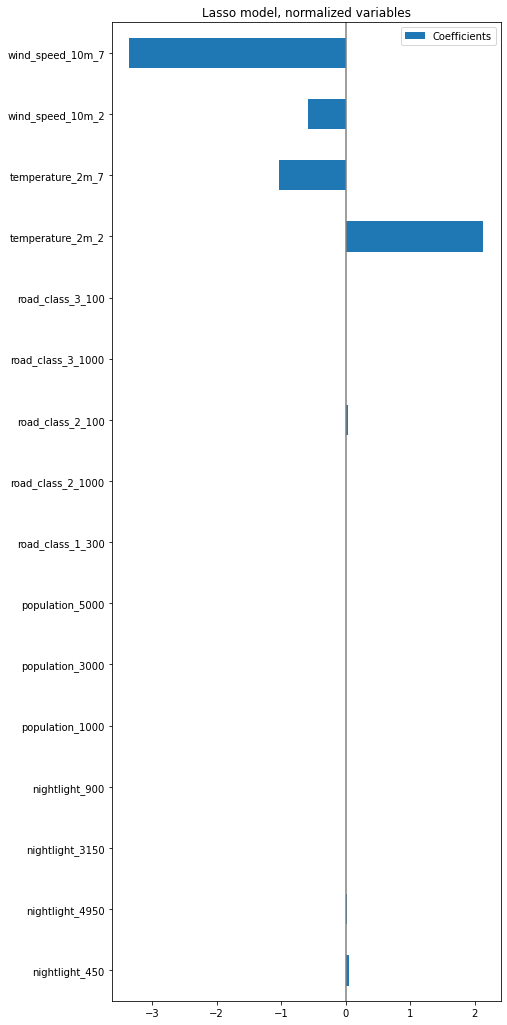

In [46]:
# For day time
model_lasso = Lasso(alpha=2e-3, normalize=True)  # try to experiment with this parameter to see how it affects the model fitting.
X = ap.filter (regex="road_class_2_100|road_class_3_100|pop|nightlight|2m_7|2m_2|10m_7|10m_2|road_class_1_300$") 
Y = ap['wkd_day_value'] 
# Make predictions every where to show the fitted curve.
y_predict = model_lasso.fit(X, Y)

coefs = pd.DataFrame(
    model_lasso.coef_,
    columns=['Coefficients'], index = list(X.columns)
)
coefs.plot(kind='barh', figsize=(9, 18))
plt.title('Lasso model, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

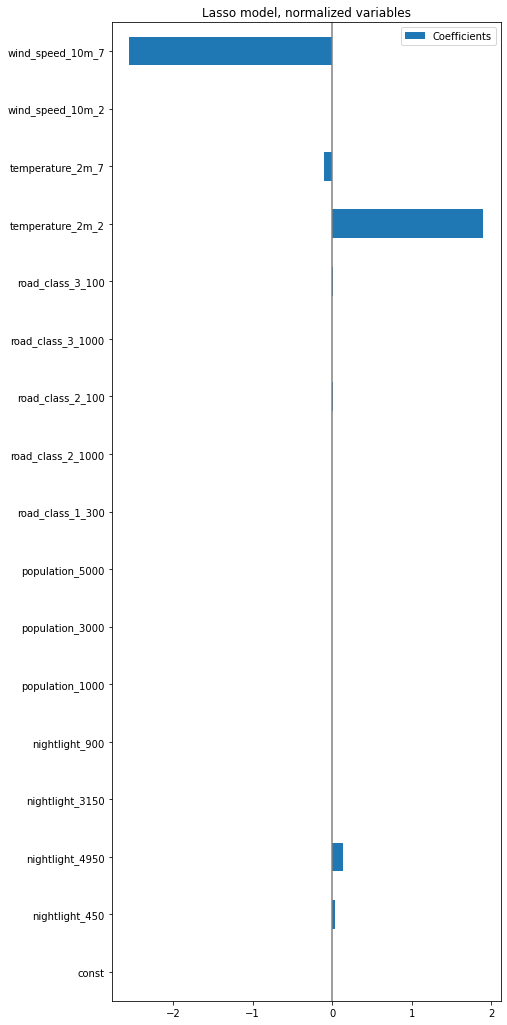

In [47]:
# For night time
model_lasso = Lasso(alpha=2e-3, normalize=True)  # try to experiment with this parameter to see how it affects the model fitting.
X = ap.filter (regex="road_class_2_100|road_class_3_100|pop|nightlight|2m_7|2m_2|10m_7|10m_2|road_class_1_300$") 
Y = ap['wkd_night_value'] 
X = sm.add_constant(X) # adding a constant
# Make predictions every where to show the fitted curve.
y_predict = model_lasso.fit(X, Y)

coefs = pd.DataFrame(
    model_lasso.coef_,
    columns=['Coefficients'], index = list(X.columns)
)
coefs.plot(kind='barh', figsize=(9, 18))
plt.title('Lasso model, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Additional tips: 

##### The plot_regress_exog function is a convenience function that gives a 2x2 plot containing 

1. the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, 
2. the residuals of the model vs. the chosen independent variable, 
3. a partial regression plot, 
4. and a CCPR plot. 

This function can be used for quickly checking modeling assumptions with respect to a single regressor.

In [48]:
#sm.graphics.plot_regress_exog(res, 'road_class_2_50')
#plt.show()


In [49]:
##### A convenient way of searching for documentation for statsmodel. 

In [50]:
#sm.webdoc()
#sm.webdoc(sm.OLS)

Acknowledgement: the line fitting part of the tutorial is made together with Dr. Jiong Wang from ITC, the Netherlands.